## importing required libraries

In [7]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sqlite3    ## SQL Interface
import pickle     ## Used to save your data - Converts objects to byte stream and vice versa


## Modules to perform Text Preprocessing

from sklearn.feature_extraction.text import CountVectorizer  ## TFIDF Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.metrics import confusion_matrix


from sklearn.naive_bayes import BernoulliNB 
from sklearn.naive_bayes import MultinomialNB 

import gensim    ## To build Word2Vec model

## reading the final.sqlite file

In [2]:
con=sqlite3.connect("final.sqlite")
data=pd.read_sql_query("select * from Reviews",con)
con.close

<function Connection.close>

## separting the positive and negative review and creating a dataframe with all negative reviews and 65000 positive reviews 

In [3]:
negative=data[data["Score"]==0 ][["Score","Time","CleanedSummary","CleanedText"]]
positive=data[data["Score"]==1 ][["Score","Time","CleanedSummary","CleanedText"]]
data=pd.concat([negative,positive.iloc[:65000,:]],axis=0,ignore_index=True)
data.sort_values("Time",inplace=True)

In [4]:
data

,Score,Time,CleanedSummary,CleanedText
89279,1,944092800,entertainingl funny,beetlejuic well written movi everyth excel act...
99092,1,944438400,modern day fairy tale,twist rumplestiskin captur film star michael k...
21840,0,948240000,clamshell edition edited version,alway enjoy movi funni entertain didnt hesit p...
114632,1,951523200,bettlejuice bettlejuice bettlejuice,happen say name three time michael keaten star...
113134,1,961718400,great product,realli good idea final product outstand use de...
64542,1,965779200,must,easi use not make mess offer vibrant color not...
88945,1,966297600,fresh original film master storyteller tim burton,great film dont even know sum first complet or...
76537,1,975974400,needs wilton,sick scad nasti toothpick counter tint concept...
50919,0,992217600,casper ghost,michael keaton bring distinguish characterist ...
8665,0,997228800,great movie terrible dvd,continu amaz shoddi treatment movi get dvd rel...


In [5]:
data.head()

,Score,Time,CleanedSummary,CleanedText
89279,1,944092800,entertainingl funny,beetlejuic well written movi everyth excel act...
99092,1,944438400,modern day fairy tale,twist rumplestiskin captur film star michael k...
21840,0,948240000,clamshell edition edited version,alway enjoy movi funni entertain didnt hesit p...
114632,1,951523200,bettlejuice bettlejuice bettlejuice,happen say name three time michael keaten star...
113134,1,961718400,great product,realli good idea final product outstand use de...


## performing Count BOW on cleaned Text column

In [8]:
bow_vect=CountVectorizer()
bow=bow_vect.fit_transform(data["CleanedText"].values)

In [9]:
X=bow

## separating the class values

In [11]:
y=data["Score"].values

## splitting the data for testing and training 

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,shuffle=False)

## performing cross validation to find optimum value of alpha

In [15]:
alpha=np.linspace(0.1,1,10)
cv_scores=[]
for a in alpha:
    clf=MultinomialNB(alpha=a)
    scores=cross_val_score(clf,X_train,Y_train,cv=10,scoring="accuracy")
    cv_scores.append(scores.mean())
MSE=[1-x for x in cv_scores]
optimal_alpha=alpha[MSE.index(min(MSE))]

In [16]:
optimal_alpha

1.0

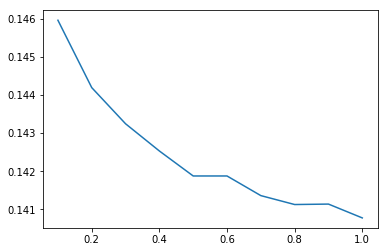

In [17]:
plt.plot(alpha,MSE)


### training the MultinimialNB model with the found optimum alpha value and testing the model to find accuracy and confusion matrix

In [18]:
clf=MultinomialNBfrom sklearn.metrics import f1_score


f1_score(Y_test, y_pred) 

f1_score(Y_test, y_pred, average='micro') 

f1_score(Y_test, y_pred, average=None) (alpha=optimal_alpha)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
acc=accuracy_score(Y_test,y_pred,normalize=True)*float(100)
print(acc)
confusion_matrix(Y_test,y_pred).T

85.65774028881063


array([[15421,  2413],
       [ 2841, 15958]], dtype=int64)

## feature extraction on both classes

In [19]:
idx=(-clf.feature_log_prob_).argsort()[:2,:50]
print("Top 50 words in negative reviews")
for i in idx[0]:
    print(bow_vect.get_feature_names()[i])
print("***************************************")
print("50 positive word ")
for i in idx[1]:
    print(bow_vect.get_feature_names()[i])


Top 50 words in negative reviews
not
tast
like
product
one
flavor
tri
would
good
coffe
use
get
buy
order
food
tea
dont
box
even
amazon
make
much
bag
time
eat
realli
look
love
packag
review
purchas
dog
bought
first
disappoint
bad
chocol
better
want
also
price
think
know
could
made
water
say
didnt
drink
sugar
***************************************
50 positive word 
not
like
tast
good
flavor
love
great
use
one
product
tri
tea
coffe
make
get
food
time
buy
would
realli
eat
amazon
find
also
price
best
much
dont
littl
order
well
store
drink
ive
bag
even
mix
dog
chocol
better
year
day
recommend
sweet
sugar
box
found
water
high
first


In [20]:
from sklearn.metrics import f1_score


In [21]:
f1_score(Y_test, y_pred) 

0.8586494484799568

In [22]:
f1_score(Y_test, y_pred, average='micro') 

0.8565774028881064

In [23]:
f1_score(Y_test, y_pred, average=None) 

array([0.85444371, 0.85864945])